# Autoregressive (AR) MODEL


[Mastering Time-Series Analysis & Forecasting - Episode 8](https://youtu.be/TiXJ2bL0Yeg)
</br></br>
By <span style="color: purple;font-weight:bold">Tiger4Code</span>:
www.<span style="color: blue;">Youtube.com/</span><span style="color: red;">@Tiger4Code</span>


# Autoregressive Model (AR)

Python script to determine the p-value for an AR model using Partial Autocorrelation Function (PACF). It generates a synthetic time series representing the monthly simple return of an asset, visualizes the PACF, determines the best p value, and fits the AR model to predict future values.

Import Libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

In [47]:
# Uncomment the intall below to be able to load time series return datasets from Yahoo Finance
#!pip install yfinance --upgrade --no-cache-dir


In [ ]:
import yfinance as yf

# Define the stock symbol and the period for the data
stock_symbol = 'AAPL'  # You can change this to any stock symbol (e.g., 'MSFT', 'GOOGL')
start_date = '2020-01-01'
end_date = '2023-01-01'

# Load the data
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
stock_data = stock_data.dropna()

# Display the data
stock_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.796013,72.856606,71.545380,71.799866,135480400
2020-01-03,72.088295,72.851761,71.862892,72.020432,146322800
2020-01-06,72.662704,72.701485,70.953995,71.206062,118387200
2020-01-07,72.320984,72.929329,72.100426,72.672417,108872000
2020-01-08,73.484367,73.787331,72.022872,72.022872,132079200


### Univariate time series analysis
Predict future values for closing price

In [107]:

time_series = pd.Series(data=stock_data['Close', 'AAPL'], index=stock_data.index, name="Monthly Returns")
time_series.dropna(inplace=True)
time_series

Date
2020-01-02     72.796013
2020-01-03     72.088295
2020-01-06     72.662704
2020-01-07     72.320984
2020-01-08     73.484367
                 ...    
2022-12-23    130.487778
2022-12-27    128.676849
2022-12-28    124.728363
2022-12-29    128.261230
2022-12-30    128.577881
Name: Monthly Returns, Length: 756, dtype: float64

### Step 1: Generate Synthetic Time Series for Monthly Returns


In [108]:
# np.random.seed(42)  # For reproducibility
# months = pd.date_range(start="2015-01-01", periods=120, freq="M")
# returns = np.random.normal(loc=0.01, scale=0.05, size=len(months))  # Mean=1%, Std Dev=5%

# time_series = pd.Series(data=returns, index=months, name="Monthly Returns")

### Step 2: Visualize the Time Series

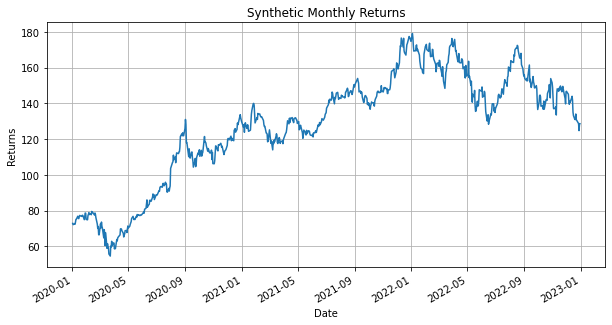

In [109]:
plt.figure(figsize=(10, 4))
time_series.plot(title="Synthetic Monthly Returns", figsize=(10, 5))
plt.xlabel("Date")
plt.ylabel("Returns")
plt.grid()
plt.show()

### Step 3: Compute and Plot the PACF

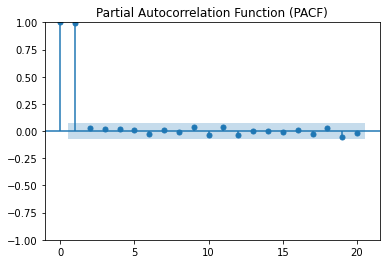

In [110]:
plot_pacf(time_series, lags=20, method='ywm', alpha=0.05, title="Partial Autocorrelation Function (PACF)")
plt.show()

### Step 4: Determine the Best Order (p) for AR Model

The best p is the lag where PACF cuts off (lags beyond are statistically insignificant).
Visual inspection will help decide the order.

- Notice that the last lag that is statistically significant and above the confidence level is lag 5, suggesting a value of p=5 for the AR model.



### Step 5: Fit the AR Model

In [111]:
p = 2  # Based on the above PACF plot, the visual analysis suggests p=5
ar_model = AutoReg(time_series, lags=p, old_names=False).fit()

# Display AR Model Summary
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:        Monthly Returns   No. Observations:                  756
Model:                     AutoReg(2)   Log Likelihood               -1827.382
Method:               Conditional MLE   S.D. of innovations              2.731
Date:                Sun, 12 Jan 2025   AIC                           3662.763
Time:                        19:33:12   BIC                           3681.265
Sample:                             2   HQIC                          3669.891
                                  756                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.8709      0.430      2.026      0.043       0.028       1.713
Monthly Returns.L1     0.9337      0.036     25.687      0.000       0.862       1.005
Monthly Returns.L2  

/Users/lighttiger/opt/anaconda3/envs/py38-ml/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


### Step 6: Predict Future Values

In [112]:
n_forecast = 12  # Forecast for the next 12 months
forecast = ar_model.predict(start=len(time_series), end=len(time_series) + n_forecast - 1)

/Users/lighttiger/opt/anaconda3/envs/py38-ml/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/lighttiger/opt/anaconda3/envs/py38-ml/lib/python3.8/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [113]:
forecast

756    128.634690
757    128.706775
758    128.777496
759    128.847861
760    128.917812
761    128.987356
762    129.056495
763    129.125230
764    129.193564
765    129.261500
766    129.329040
767    129.396187
dtype: float64

In [114]:
# Generate a date index for the forecast starting one month after the last date in time_series
last_date = time_series.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_forecast, freq='M')
# Convert forecasted values to a Series with the new date index
forecast_series = pd.Series(forecast.values, index=forecast_dates, name="Forecasted Returns")
forecast_series

2022-12-31    128.634690
2023-01-31    128.706775
2023-02-28    128.777496
2023-03-31    128.847861
2023-04-30    128.917812
2023-05-31    128.987356
2023-06-30    129.056495
2023-07-31    129.125230
2023-08-31    129.193564
2023-09-30    129.261500
2023-10-31    129.329040
2023-11-30    129.396187
Freq: M, Name: Forecasted Returns, dtype: float64

### Step 7: Visualize Forecasted Values

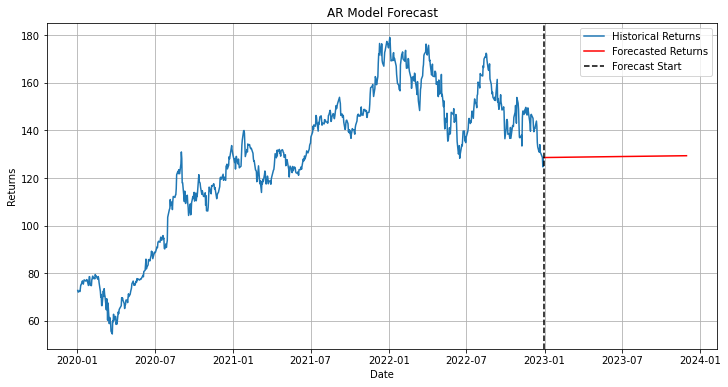

In [115]:
plt.figure(figsize=(12, 6))
plt.plot(time_series, label="Historical Returns")
plt.plot(forecast_series, label="Forecasted Returns", color="red")
plt.axvline(x=time_series.index[-1], color="black", linestyle="--", label="Forecast Start")
plt.title("AR Model Forecast")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend()
plt.grid()
plt.show()

### Optional: Evaluate Model Performance (In-Sample)

In [116]:
predicted = ar_model.predict(start=p, end=len(time_series) - 1)
actual = time_series[p:]
mse = mean_squared_error(actual, predicted)
print(f"Mean Squared Error (In-Sample): {mse:.5f}")


ValueError: Input contains NaN.

### Plot Actual vs Predicted Values

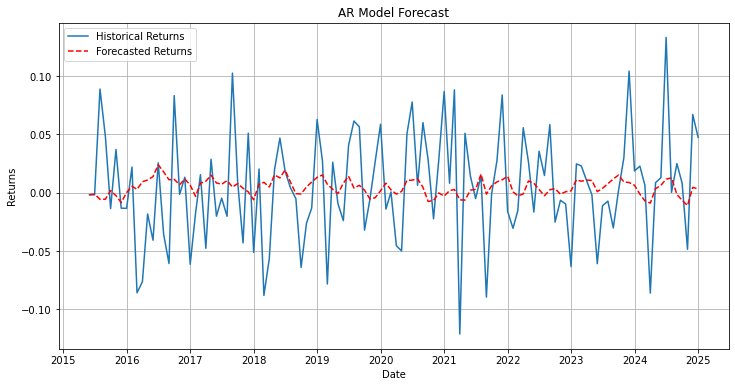

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(actual, label="Historical Returns")
plt.plot(predicted, label="Forecasted Returns", color="red", linestyle="--")
#plt.axvline(x=time_series.index[-1], color="black", linestyle="--", label="Forecast Start")
plt.title("AR Model Forecast")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend()
plt.grid()
plt.show()